In [66]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Création du graphe #

### 1.1. Liste des arrêtes ###

In [67]:
### Paramètres : p est une distribution "jouet" pour éviter les éléments nuls dans le calcul de l'entropie croisée

N = 10 # nombre d'individus
max_fr = 5 # nombre maximum de voisins par individu
p = np.array([0.2, 0.3, 0.1, 0.2, 0.2]) # probabilité d'avoir i amis, 0 <= i <= max_fr-1

In [68]:
### Simulation du nombre de voisins par individu

verts = np.random.choice(max_fr, N, p=p)
print(verts)

[1 1 4 2 0 3 0 4 2 4]


In [80]:
### Création de la liste des associations
# Entrée : nombre de voisins par individu
# Sorite : liste des associations sans les boucles et multiples affectations

def assoc(ver):
    # Création d'une liste intermédiaire où le nombre d'occurrences de l'individu i est son nombre de voisins
    neigh = np.array([])
    for i in range(len(ver)):
        for j in range(ver[i]):
            neigh = np.append(neigh, i)
    
    # Simulation de la liste des associations selon la méthode décrite dans l'article
    assoc = np.array([])
    while (len(neigh) > 1): # on vide la liste au maximum (reste 1 élément si longueur impaire)
        i = np.random.randint(len(neigh)) # on choisit au hasard 2 éléments
        a = neigh[i]
        neigh = np.delete(neigh, i) # qu'on enlève de la liste
        j = np.random.randint(len(neigh)) # on choisit au hasard 2 éléments
        b = neigh[j]
        neigh = np.delete(neigh, j) # qu'on enlève de la liste
        if a != b: # on n'inscrit pas l'association si c'est une boucle directe
            assoc = np.append(assoc, np.array([a, b]), axis=0)
    
    assoc = np.reshape(assoc, (-1, 2))
    assoc = np.sort(assoc) # petit tri
    assoc = [tuple(row) for row in assoc]
    assoc = np.unique(assoc, axis=0) # on vire les multiples
    
    return(assoc)

In [91]:
asso = assoc(verts)
print(asso)

[[0. 9.]
 [1. 2.]
 [2. 3.]
 [2. 5.]
 [2. 7.]
 [3. 5.]
 [7. 8.]
 [7. 9.]
 [8. 9.]]


In [92]:
### Création de la liste des voisins
# Entrée : associations sans boucle et multiples
# Sortie : liste des voisins pour chaque individu

def neigh(asso):
    
    
    neig = []

    for i in range(N):
        n_i = np.array([])
    
        for j in range(len(asso)): # on parcourt les duos
        
            if asso[j][0] == i: # on vérifie si l'individu est dans un duo, si oui on garde son partenaire
                n_i = np.append(n_i, asso[j][1])
            elif asso[j][1] == i: 
                n_i = np.append(n_i, asso[j][0])
        
        n_i = list(n_i)
        neig.append(n_i)
    return(np.array(neig))

In [93]:
neighs = neigh(asso)
print(neighs)

[list([9.0]) list([2.0]) list([1.0, 3.0, 5.0, 7.0]) list([2.0, 5.0])
 list([]) list([2.0, 3.0]) list([]) list([2.0, 8.0, 9.0]) list([7.0, 9.0])
 list([0.0, 7.0, 8.0])]


### 1.2. Comparaison des probabilités ###

In [94]:
### Calcul du nombre de voisins effectif après associations

def N_vois(asso):
    N_vois = np.array([])
    for i in range(N):
        N_vois = np.append(N_vois, (asso == i).sum())
    return(N_vois)

In [95]:
neig = N_vois(asso)
print(neig)

[1. 1. 4. 2. 0. 2. 0. 3. 2. 3.]


In [96]:
### Calcul de la probabilité empirique de la distibution des voisins

def empirical_prob(nb_nei):
    q = np.array([])
    for i in range(len(p)):
        q = np.append(q, (nb_nei == i).sum() / len(nb_nei))
    return(q)

In [97]:
emp = empirical_prob(neig)
print(emp)

[0.2 0.2 0.3 0.2 0.1]


In [98]:
### Entropie croisée

def cross_entropy(p, q):
    assert len(p) == len(q)
    ce = 0
    for i in range(len(p)):
        ce -= p[i] * np.log(q[i])
    return(ce)

In [99]:
cross_entropy(p, p)

1.5571130980576458

In [100]:
cross_entropy(p, emp)

1.7075208377352729

Text(0.5, 1.0, "Entropie croisée réduite = f(nombre d'individus)")

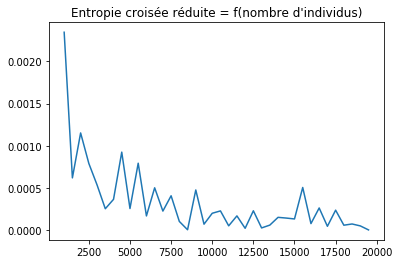

In [103]:
### Entropie croisée entre probabilités théorique et empirique en fonction de la taille de la population minus l'entropie croisée minimale

Ns = np.arange(1000, 20000, 500)
CEs = np.array([])
for N in Ns:
    verts = np.random.choice(max_fr, N, p=p)
    asso = assoc(verts)
    neig = N_vois(asso)
    emp = empirical_prob(neig)
    CEs = np.append(CEs, cross_entropy(p, emp) - cross_entropy(p, p)) # différence entre entropie croisée et entropie croisée minimale

plt.plot(Ns, CEs)
plt.title("Entropie croisée réduite = f(nombre d'individus)")

### 1.3. Poisson et heavy-tail ###

In [19]:
### Distribution des voisins selon la loi de Poisson

N = 10

vertsPoiss = np.random.poisson(4, N)
print(vertsPoiss)

[4 3 6 3 5 5 2 0 7 5]


In [20]:
assoPoiss = assoc(vertsPoiss)
print(assoPoiss)

[[0. 3.]
 [0. 4.]
 [1. 8.]
 [1. 9.]
 [2. 4.]
 [2. 8.]
 [3. 5.]
 [3. 8.]
 [4. 5.]
 [4. 6.]
 [4. 9.]
 [5. 6.]
 [5. 8.]
 [5. 9.]
 [8. 9.]]


In [104]:
### Distribution des voisins selon la loi heavy-tail 

N = 10

probaHT1 = np.array([])
for i in range(N):  # il ne peut y avoir plus de voisins que d'individus
    probaHT1 = np.append(probaHT1, (i + 1)**-2.5)
    probaHT1 /= probaHT1.sum()

a = np.random.choice(N, N, p=probaHT1)
b = np.random.poisson(3.1, N)
print(a)
print(b)
vertsHT = a + b
print(vertsHT)

[0 0 0 2 0 0 0 0 0 0]
[7 3 5 0 0 2 2 4 3 4]
[7 3 5 2 0 2 2 4 3 4]


In [105]:
print(probaHT1) # heavy-tail

[0.73698254 0.13028134 0.055635   0.02884059 0.01702523 0.01098601
 0.00755737 0.00545416 0.00408544 0.00315231]


In [24]:
assoHT = assoc(vertsHT)
print(assoHT)

[[0. 3.]
 [0. 4.]
 [0. 6.]
 [0. 7.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 6.]
 [2. 7.]
 [2. 9.]
 [3. 5.]
 [3. 6.]
 [3. 9.]
 [4. 8.]
 [5. 6.]
 [6. 7.]
 [6. 9.]]


# 2. Modèles d'épidémie #

### 2.1. Sans vaccination ###

In [62]:
# Poisson

N = 10

vertsPoiss = np.random.poisson(4, N)
print(vertsPoiss)

[4 2 6 3 3 4 5 3 4 2]


In [63]:
assoPoiss = assoc(vertsPoiss)
print(assoPoiss)

[[0. 1.]
 [0. 3.]
 [0. 4.]
 [0. 5.]
 [1. 7.]
 [2. 3.]
 [2. 6.]
 [2. 7.]
 [5. 7.]
 [6. 9.]]


In [64]:
neighPoiss = neigh(assoPoiss)
print(neighPoiss)

[list([1.0, 3.0, 4.0, 5.0]) list([0.0, 7.0]) list([3.0, 6.0, 7.0])
 list([0.0, 2.0]) list([0.0]) list([0.0, 7.0]) list([2.0, 9.0])
 list([1.0, 2.0, 5.0]) list([]) list([6.0])]


In [65]:
### Modèle d'épidémie sur graphe sans vaccin

### 0 <-> sain, 1 <-> infecté, 2 <-> rémis
infected = np.zeros(N)
first_infected = np.random.randint(N) # premier infecté aléatoirement
infected[first_infected] = 1
print(infected)

T = 0
lbd = 1
gmm = 1

while (infected == 1).sum() > 0:
    
    
    # pour chaque individu on calcule tous les temps intéressants
    Ts = np.array([])
    for i in range(len(infected)):
       
        # s'il est infecté : calcul du temps de rémission et des temps d'infection
        if infected[i] == 1:
            
            Trem = np.random.exponential(1/gmm) # temps de rémission
            Ts = np.append(Ts, np.array([Trem, i]))
            
            for nei in neighPoiss[i]: 
                if infected[int(nei)] == 0:
                    Tinf = np.random.exponential(1/lbd) # temps d'infection pour chaque voisin
                    Ts = np.append(Ts, [Tinf, nei])
            
    
    times = Ts[::2]
    pos = Ts[1::2]
    
    Tau, pTau = np.amin(times), np.argmin(times) # on garde le temps minimum
    
    chosen = int(pos[pTau]) # on change le statut de l'individu associé 
    if infected[chosen] == 0:
        infected[chosen] = 1
    elif infected[chosen] == 1:
        infected[chosen] = 2
    
    T += Tau

print(infected)
print(T)
print ("Part d'infectés : ",(infected == 2).sum()/N)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2. 2. 2. 2. 0. 2. 2. 2. 0. 0.]
3.137455529604671
Part d'infectés :  0.7


### 2.2. Vaccination : modèle 1 ###

In [ ]:
infected = np.zeros(N)
first_infected = np.random.randint(N)
infected[first_infected] = 1
print(infected)

##########################################################################
# ajout : détection du 1er infecté #

# TO DO

##########################################################################


T = 0
lbd = 1
gmm = 1

while (infected == 1).sum() > 0:
    
    
    # pour chaque individu on calcule tous les temps intéressants
    Ts = np.array([])
    for i in range(len(infected)):
       
        # s'il est infecté : calcul du temps de rémission et des temps d'infection
        if infected[i] == 1:
            Trem = np.random.exponential(1/gmm)
            Ts = np.append(Ts, np.array([Trem, i]))
            
            for nei in neighPoiss[i]:
                if infected[int(nei)] == 0:
                    Tinf = np.random.exponential(1/lbd)
                    Ts = np.append(Ts, [Tinf, nei])
            
    
    times = Ts[::2]
    pos = Ts[1::2]
    
    Tau, pTau = np.amin(times), np.argmin(times)
    
    T += Tau
    
    chosen = int(pos[pTau])
    if infected[chosen] == 0:
        infected[chosen] = 1
        ##########################################################################
        # ajout : détection des infectés #

        # TO DO

        ##########################################################################
    elif infected[chosen] == 1:
        infected[chosen] = 2
    
    ##########################################################################
    # ajout : gestion des temps de détection #
    
    # TO DO
    
    ##########################################################################
    

print(infected)
print(T)
print ("Part d'infectés : ",(infected == 2).sum()/N)